# Car Price Prediction Model - Geely Auto

### Problem Statement: 
Geely Auto is planning to set up a manufacturing unit in US to expand their business but had a competetion from US and European counterparts. Hence they've contracted Automobile Consulting company to understand the most Driving factors that affects the car prices in US.

**Business Goals:**

- Building a model that identifies significant variables in predicting price of a car
- To identify how well those variables describe price of a car
- To understand pricing dynamics of a new market


### Solution:

According to CRISP-DM Framework, any Machine learning model can be developed using following steps:

- Business Understanding
- Data Understanding
- Data preparation
- Model building
- Model Evaluation
- Model Deployment

## Step 1: Reading and Understanding the Data

In [743]:
#Import required packages

import numpy as np
import pandas as pd

In [744]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [745]:
#Read data from CarPrice_Assignment.csv file

carprice = pd.read_csv("CarPrice_Assignment.csv")

In [746]:
carprice.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


Let's analyze various metrics of Carprice dataset

In [747]:
carprice.shape

(205, 26)

In [748]:
carprice.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [749]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

From the above info it is very clear that there are no null values in the dataset

In [750]:
carprice.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


**Drop Car_ID**

In [751]:
#Let's drop CarID as it is not required for analysis
carprice.drop('car_ID', axis=1, inplace=True)
carprice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


**Drop Duplicates (if any)**

In [752]:
carprice = carprice.drop_duplicates()

## Step 2: Visualising the Data

**Understanding Data** is the most important step before doing any processings. Hence let's understand dataset by visualising it by importing `matplotlib` and `seaborn` packages in python.

In [753]:
import matplotlib.pyplot as plt
import seaborn as sns

Carprice dataset is having 14 numeric variables & 11 Categorical variables. Hence let's analyze the patterns among them by visualising them separately

**Visualising Numeric Varaibles**

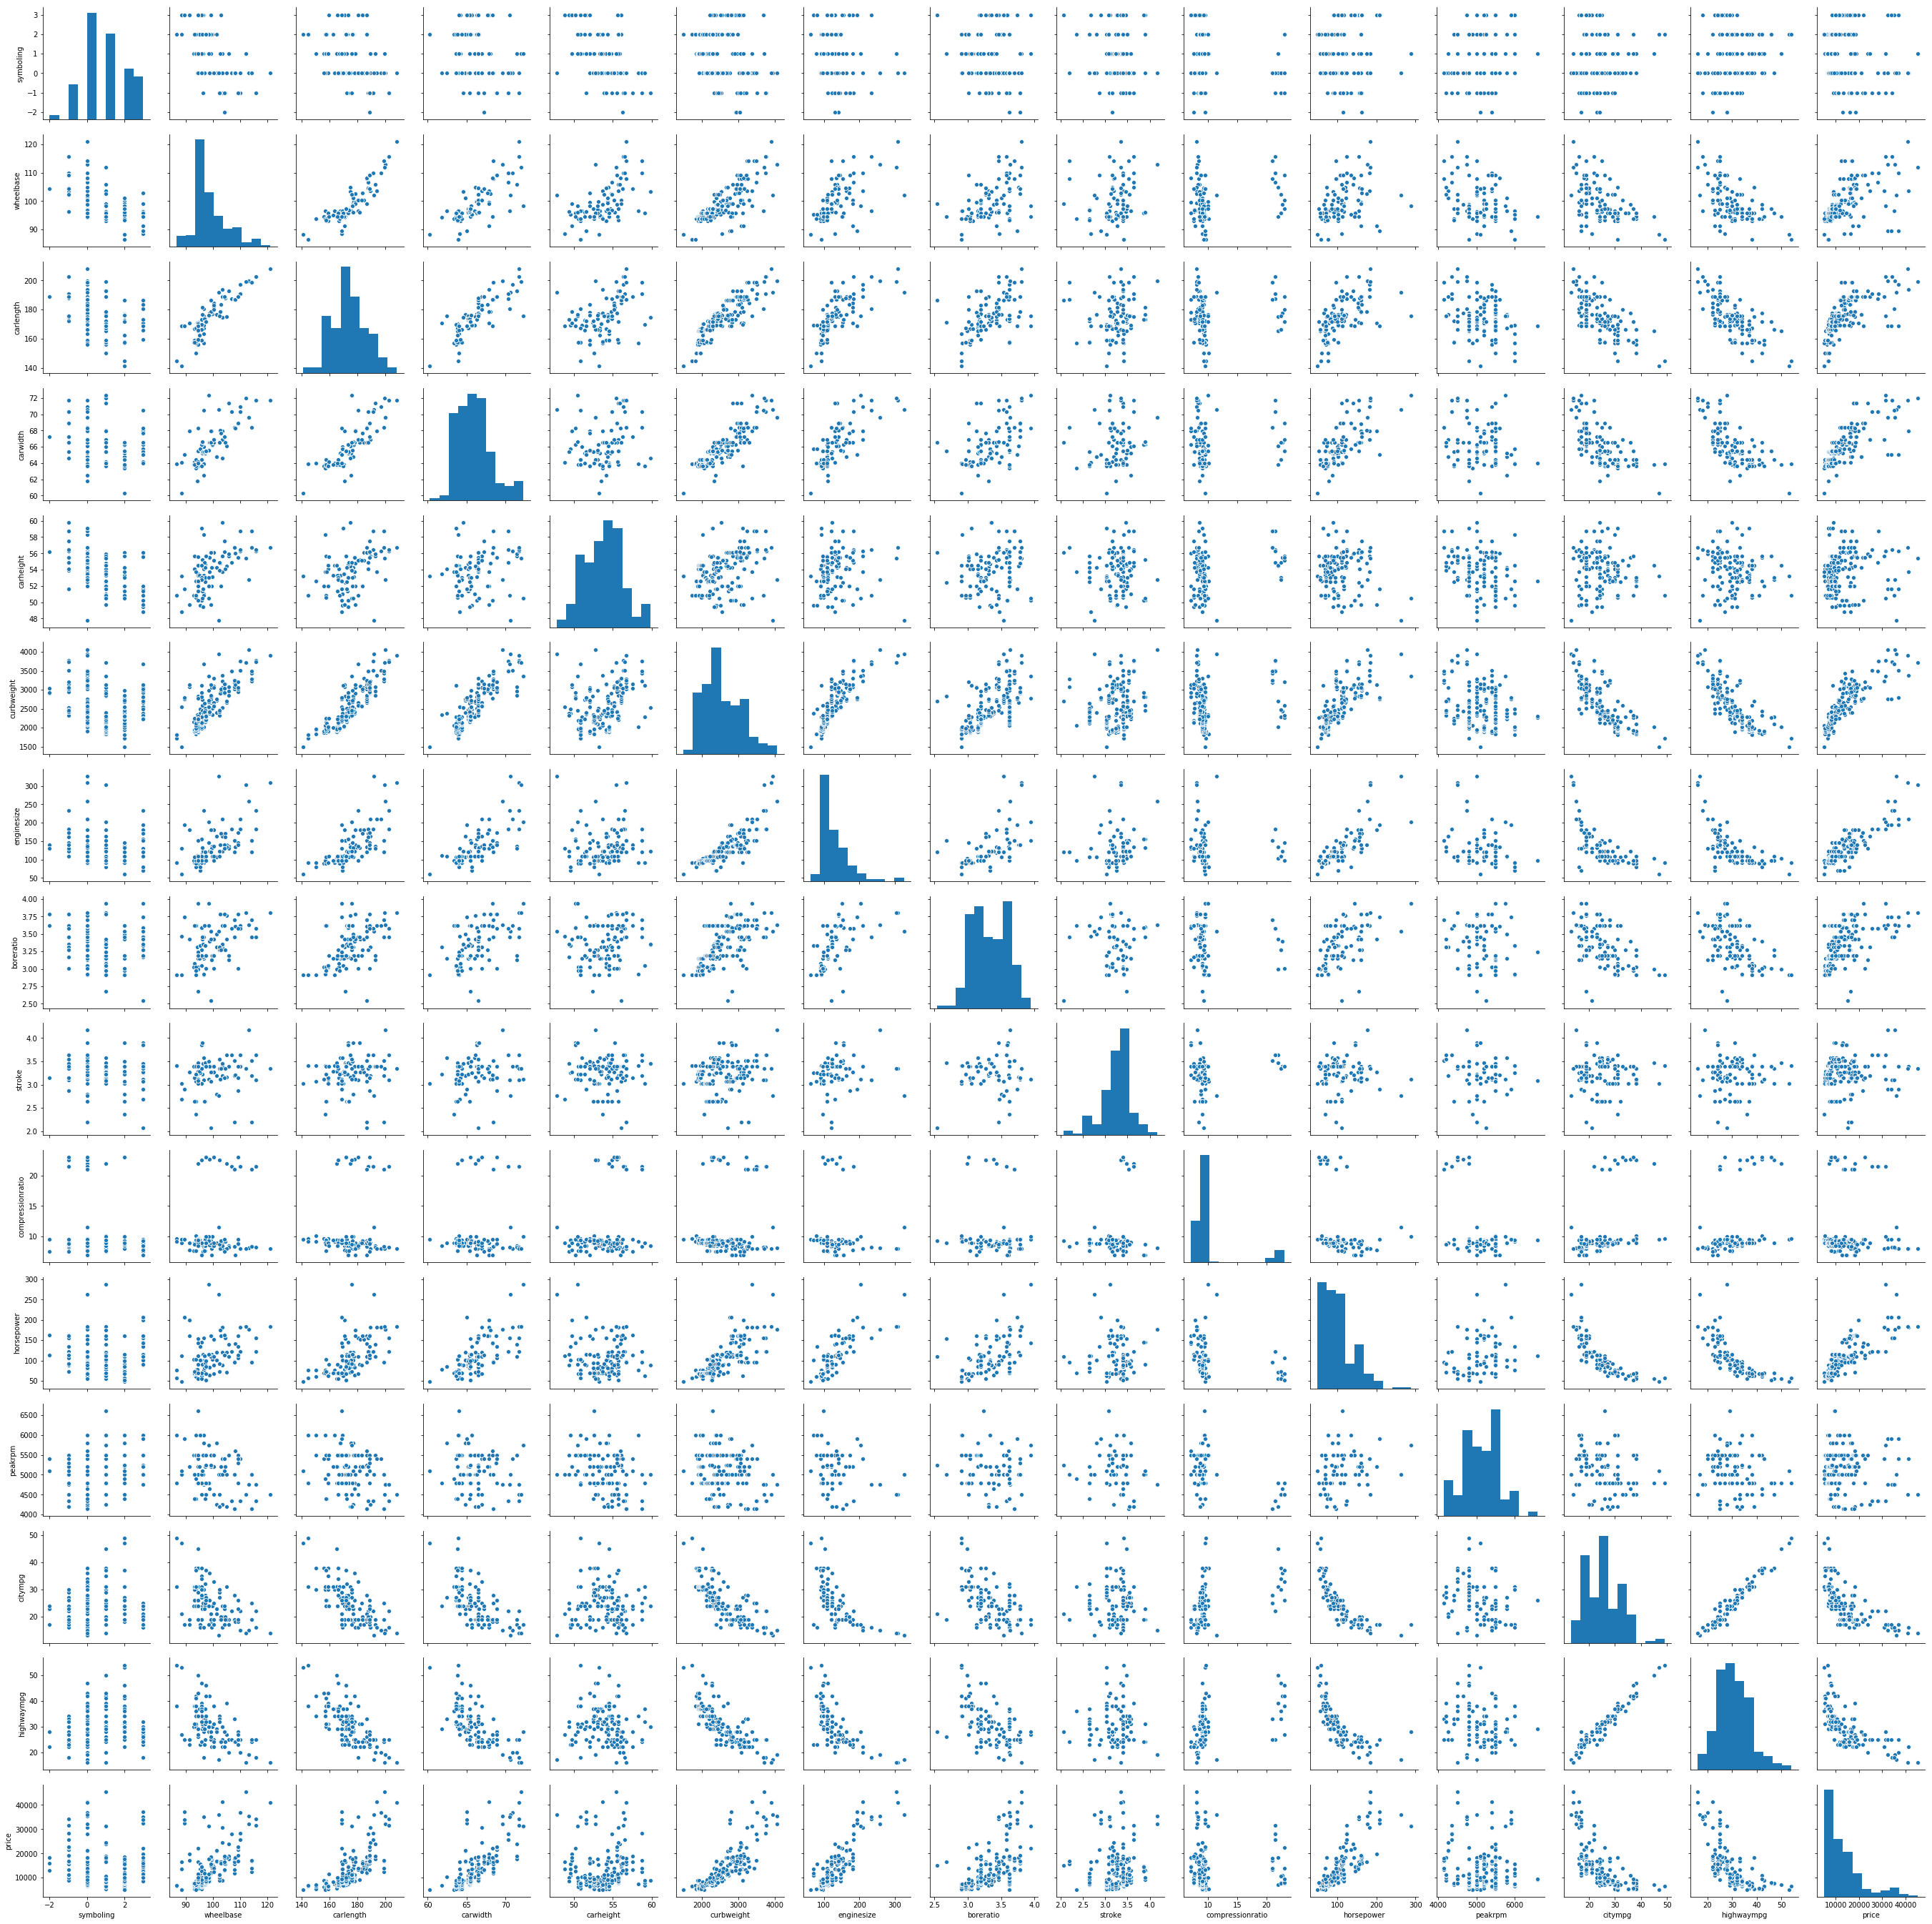

In [754]:
sns.pairplot(carprice)
plt.show()

**Correlation Matrix**

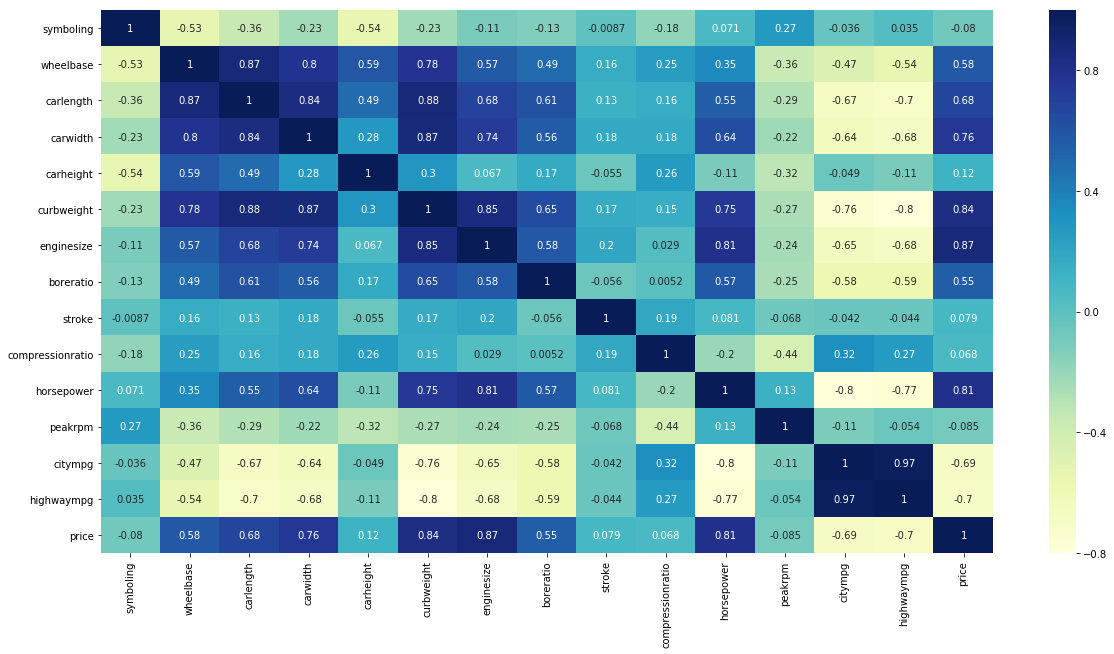

In [755]:
#Visualising Correlation matrix amongst all variables using heatmap

plt.figure(figsize=(20,10))
correlation = carprice.corr()
sns.heatmap(correlation, 
            annot= True, 
            cmap = "YlGnBu")
plt.show()

From the above heatmap following are the highly correlated variables
- wheelbase - carlength, carwidth, curbweight
- carlength - wheelbase, carwidth, curbweight
- carwidth - wheelbase, carlength, curbweight
- curbweight - wheelbase, carlength, carwidth, enginesize
- enginesize - curbweight, horsepower
- horsepower - enginesize, stroke, curbweight
- citympg - highwaympg

<font color='red'> Engine size is highlty correlated with price with value being 0.87. Hence it could be one of primary driving variable </font>

As per Data 'Dictionary-carprices.csv', Symboling (Insurance risk rating) is a categorical variables where +3 indicates that Auto is risky, -3 being pretty safe. Hence, let's convert Symobiling column with this nomenclature as shown below:

- -2, -1 : **safe**
- 0, 1 : **moderate**
- 2, 3 : **risky**

In [756]:
carprice['symboling'] = carprice['symboling'].map({-2:'safe', -1:'safe', 0:'moderate', 1:'moderate', 2:'risky', 3:'risky'})

**Extracting CarCompany from CarName**

In [757]:
carprice['CarCompany']=carprice['CarName'].apply(lambda x:x.split(' ',1)[0])
carprice.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,CarCompany
0,risky,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,risky,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,moderate,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,risky,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,risky,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [758]:
carprice['CarCompany'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

**From the above values it is observed that there are some misspelt words in the CarCompany names. Hence we need to replace them with correct names**

In [759]:
#Correcting misspelt words

carprice['CarCompany'] = carprice['CarCompany'].replace('maxda','mazda')
carprice['CarCompany'] = carprice['CarCompany'].replace('Nissan','nissan')
carprice['CarCompany'] = carprice['CarCompany'].replace('porcshce','porsche')
carprice['CarCompany'] = carprice['CarCompany'].replace('toyouta','toyota')
carprice['CarCompany'] = carprice['CarCompany'].replace(['vokswagen','vw'],'volkswagen')

**Dropping CarName**

In [760]:
# Let's drop column 'CarName' as we need to consider only 'CarCompany' as an independent variable for model building
carprice.drop('CarName', axis=1, inplace=True)

**Visualising Categorical Variables**

In [761]:
#Let's determine how many categorical variables are present in our dataset

carprice.dtypes

symboling            object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
CarCompany           object
dtype: object

In [762]:
#From the above information we can say that all 'object' dtypes are categorical variables. Hence let's store the list of categorical variables
categorical_variable_list = list(carprice.columns[carprice.dtypes == 'object'])
categorical_variable_list


['symboling',
 'fueltype',
 'aspiration',
 'doornumber',
 'carbody',
 'drivewheel',
 'enginelocation',
 'enginetype',
 'cylindernumber',
 'fuelsystem',
 'CarCompany']

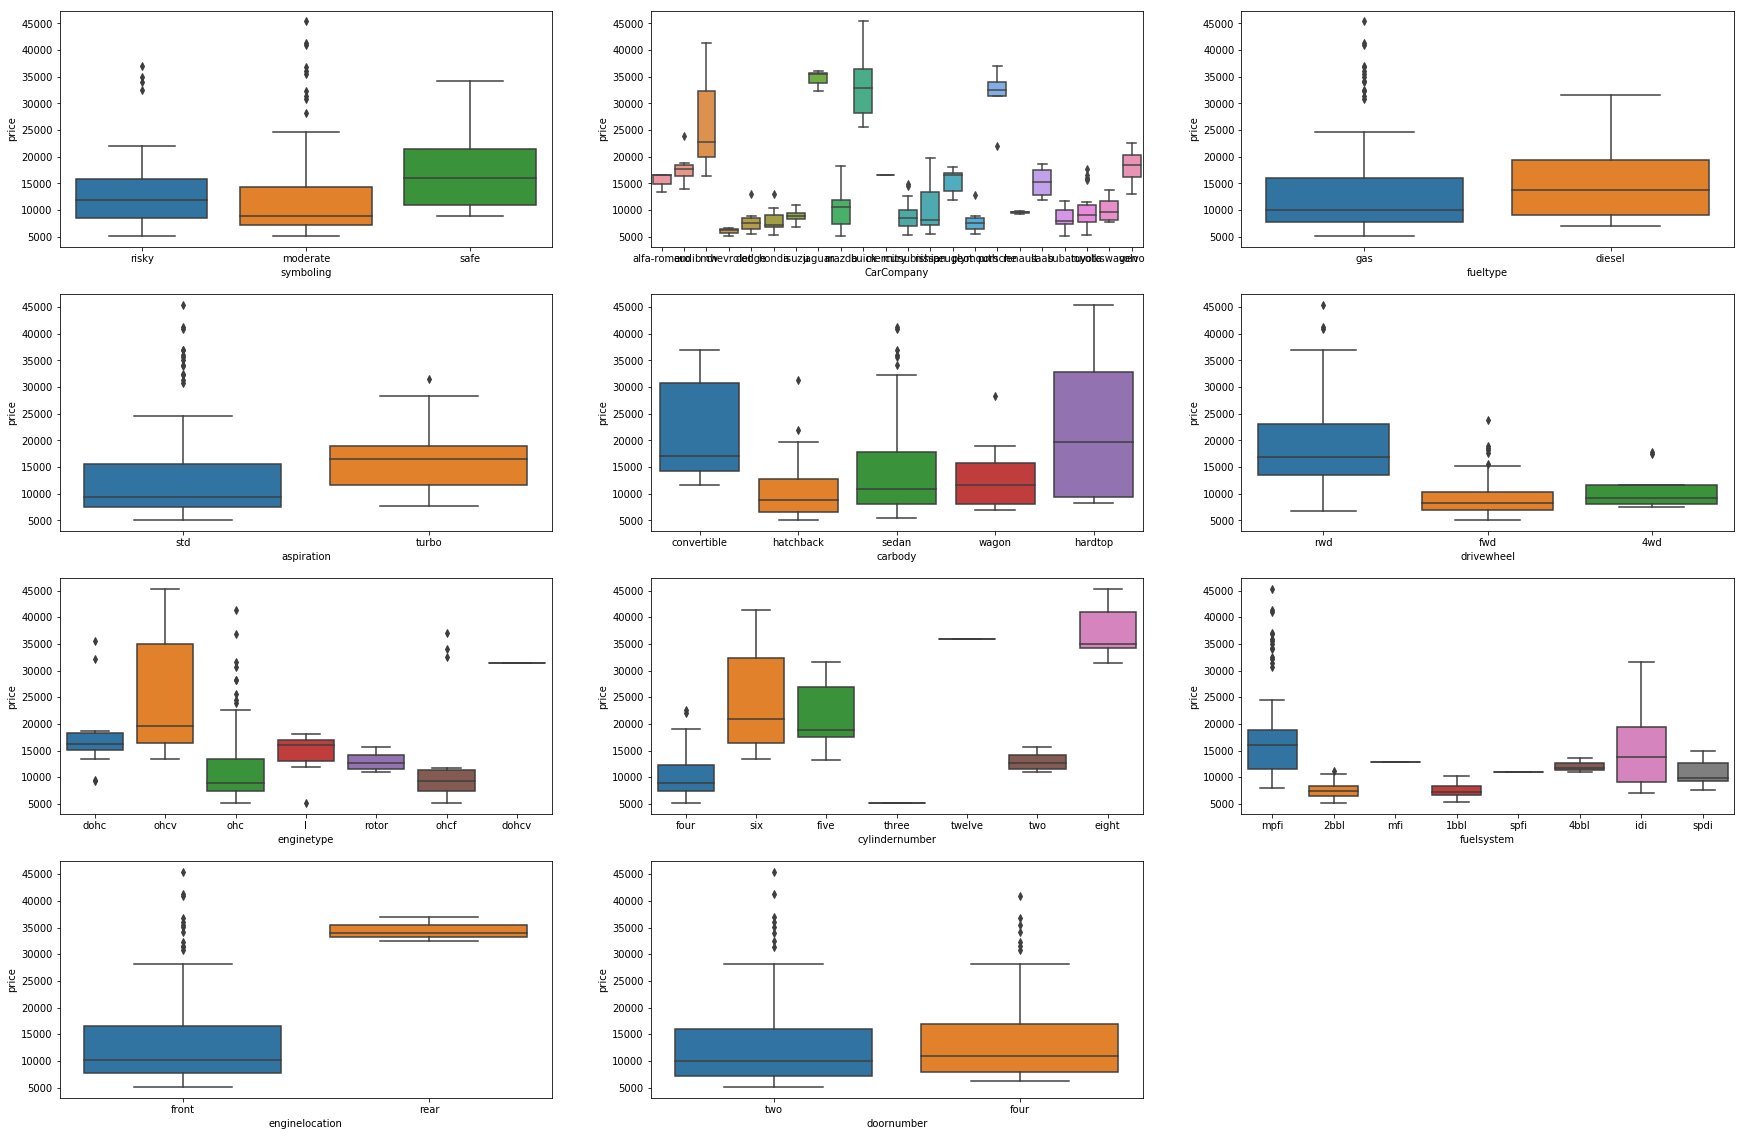

In [763]:
#Let's draw BoxPlot to analyse categorical variables
plt.figure(figsize=(30, 20))
plt.subplot(4,3,1)
sns.boxplot(x = 'symboling', y = 'price', data = carprice)
plt.subplot(4,3,2)
sns.boxplot(x = 'CarCompany', y = 'price', data = carprice)
plt.subplot(4,3,3)
sns.boxplot(x = 'fueltype', y = 'price', data = carprice)
plt.subplot(4,3,4)
sns.boxplot(x = 'aspiration', y = 'price', data = carprice)
plt.subplot(4,3,5)
sns.boxplot(x = 'carbody', y = 'price', data = carprice)
plt.subplot(4,3,6)
sns.boxplot(x = 'drivewheel', y = 'price', data = carprice)
plt.subplot(4,3,7)
sns.boxplot(x = 'enginetype', y = 'price', data = carprice)
plt.subplot(4,3,8)
sns.boxplot(x = 'cylindernumber', y = 'price', data = carprice)
plt.subplot(4,3,9)
sns.boxplot(x = 'fuelsystem', y = 'price', data = carprice)
plt.subplot(4,3,10)
sns.boxplot(x = 'enginelocation', y = 'price', data = carprice)
plt.subplot(4,3,11)
sns.boxplot(x = 'doornumber', y = 'price', data = carprice)
plt.show()

Text(0.5, 1.0, 'Company Vs Price')

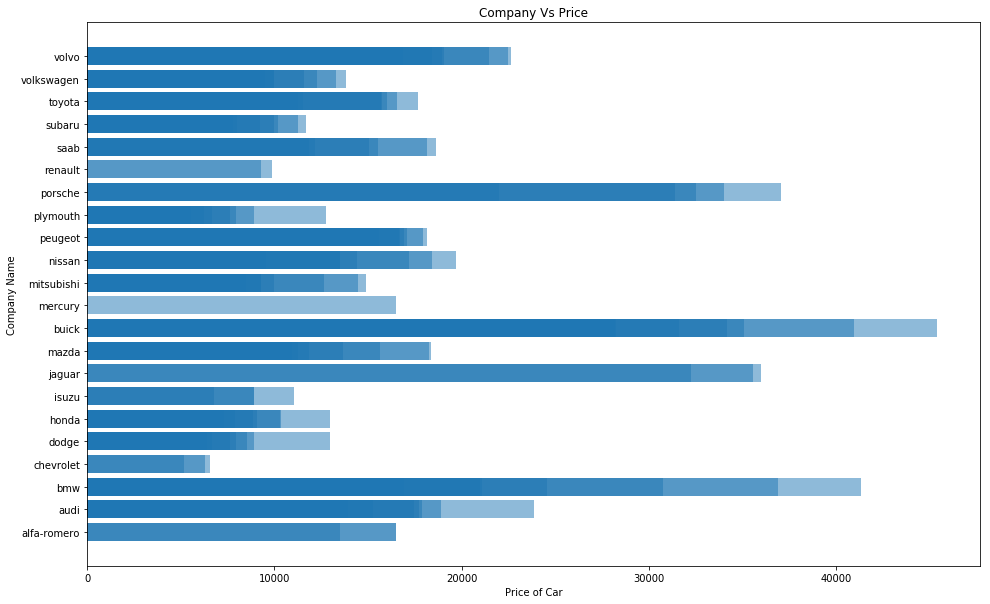

In [764]:
plt.figure(figsize=(16,10))
ax=plt.subplot(1,1,1)
plt.barh(carprice['CarCompany'], carprice['price'], align='center', alpha=0.5)
plt.xlabel('Price of Car')
plt.ylabel('Company Name')
plt.title('Company Vs Price')

In [765]:
carprice.groupby('CarCompany')['price'].sum().sort_values(ascending = False)

CarCompany
toyota         316346.000
buick          269176.000
bmw            208950.000
volvo          198695.000
nissan         187482.000
mazda          181099.000
peugeot        170380.000
porsche        157002.500
audi           125014.167
volkswagen     120930.000
mitsubishi     120117.000
honda          106401.000
jaguar         103800.000
subaru         102495.000
saab            91340.000
dodge           70879.000
plymouth        55744.000
alfa-romero     46495.000
isuzu           35666.000
renault         19190.000
chevrolet       18021.000
mercury         16503.000
Name: price, dtype: float64

<font color='red'>It is observed that Toyota is the highest US Marketing company. Hence this could be competetor for our company</font>

It is observed that `Car Company` is of string datatype which cannot be used while building a model. Hence, Let's Categorize the Company names based on Average price they are generating in the US Market

In [766]:
#Average Price generated by a company
carprice.groupby('CarCompany')['price'].mean().sort_values(ascending = False)

CarCompany
jaguar         34600.000000
buick          33647.000000
porsche        31400.500000
bmw            26118.750000
volvo          18063.181818
audi           17859.166714
mercury        16503.000000
alfa-romero    15498.333333
peugeot        15489.090909
saab           15223.333333
mazda          10652.882353
nissan         10415.666667
volkswagen     10077.500000
toyota          9885.812500
renault         9595.000000
mitsubishi      9239.769231
isuzu           8916.500000
subaru          8541.250000
honda           8184.692308
plymouth        7963.428571
dodge           7875.444444
chevrolet       6007.000000
Name: price, dtype: float64

From the above values let's categorize `CarCompany` as follows:
- low : Average price <=10000
- medium : Average price <=20000
- high : Average price <= 30000

In [767]:
#Let's map above values with the categories defined

company_mapped_category = {
    'jaguar':'high',
    'buick' : 'high',
    'porsche' : 'high',
    'bmw' : 'high',
    'volvo': 'medium',
    'audi': 'medium',
    'mercury': 'medium',
    'alfa-romero': 'medium',
    'peugeot': 'medium', 
    'saab': 'medium',
    'mazda': 'medium',
    'nissan': 'medium',
    'volkswagen': 'medium',
    'toyota' : 'low',
    'renault' : 'low',
    'mitsubishi' : 'low',
    'isuzu' : 'low',
    'subaru' : 'low',
    'honda' : 'low',
    'plymouth' : 'low',
    'dodge' : 'low',
    'chevrolet' : 'low',
}
    
carprice['company_avg_price_level']=carprice['CarCompany'].map(company_mapped_category)


In [768]:
#Let's drop `CarCompany` variable
carprice.drop('CarCompany',axis=1, inplace = True)

## Step 3: Data Preparation

**Converting Categorical variables to respective numerical values( in order fit a regression line)**

In [769]:
#Converting categorical variables with 2-levels

carprice['fueltype']=carprice['fueltype'].map({'gas':1, 'diesel':0})
carprice['aspiration']=carprice['aspiration'].map({'std':1, 'turbo':0})
carprice['doornumber']=carprice['doornumber'].map({'two':1, 'four':1})
carprice['enginelocation']=carprice['enginelocation'].map({'front':1, 'rear':0})

In [770]:
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,company_avg_price_level
0,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,medium
1,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,medium
2,moderate,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,medium
3,risky,1,1,1,sedan,fwd,1,99.8,176.6,66.2,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,medium
4,risky,1,1,1,sedan,4wd,1,99.4,176.6,66.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,medium


**Dummy Variables**(For Handling Categorical variables with more than 2-levels)

In [771]:
#Creating Dummy variables
multilevel_categorical_variables = ['symboling','carbody', 'drivewheel','enginetype','cylindernumber','fuelsystem','company_avg_price_level']
df=pd.get_dummies(carprice[multilevel_categorical_variables])
df.columns

Index(['symboling_moderate', 'symboling_risky', 'symboling_safe',
       'carbody_convertible', 'carbody_hardtop', 'carbody_hatchback',
       'carbody_sedan', 'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l',
       'enginetype_ohc', 'enginetype_ohcf', 'enginetype_ohcv',
       'enginetype_rotor', 'cylindernumber_eight', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_three',
       'cylindernumber_twelve', 'cylindernumber_two', 'fuelsystem_1bbl',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'company_avg_price_level_high',
       'company_avg_price_level_low', 'company_avg_price_level_medium'],
      dtype='object')

We know that for Categorical variables having n-levels we require n-1 dummy variables. Hence let's drop one variable from each categorical variable

In [772]:
#Dropping First column generated for each categorical variable using 'drop_first=True' parameter

df=pd.get_dummies(carprice[multilevel_categorical_variables], drop_first = True)
df.columns

Index(['symboling_risky', 'symboling_safe', 'carbody_hardtop',
       'carbody_hatchback', 'carbody_sedan', 'carbody_wagon', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'cylindernumber_five', 'cylindernumber_four', 'cylindernumber_six',
       'cylindernumber_three', 'cylindernumber_twelve', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi', 'company_avg_price_level_low',
       'company_avg_price_level_medium'],
      dtype='object')

In [773]:
#Concatenate the results obtained in 'df' with original dataframe 'carprice'

carprice = pd.concat([carprice,df], axis=1)
carprice.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_avg_price_level_low,company_avg_price_level_medium
0,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,1
1,risky,1,1,1,convertible,rwd,1,88.6,168.8,64.1,...,0,0,0,0,0,1,0,0,0,1
2,moderate,1,1,1,hatchback,rwd,1,94.5,171.2,65.5,...,0,0,0,0,0,1,0,0,0,1
3,risky,1,1,1,sedan,fwd,1,99.8,176.6,66.2,...,0,0,0,0,0,1,0,0,0,1
4,risky,1,1,1,sedan,4wd,1,99.4,176.6,66.4,...,0,0,0,0,0,1,0,0,0,1


In [774]:
#Let's drop original columns for which we've created Dummy variables

carprice.drop(multilevel_categorical_variables, axis=1, inplace = True)
carprice.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_avg_price_level_low,company_avg_price_level_medium
0,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,0,1
1,1,1,1,1,88.6,168.8,64.1,48.8,2548,130,...,0,0,0,0,0,1,0,0,0,1
2,1,1,1,1,94.5,171.2,65.5,52.4,2823,152,...,0,0,0,0,0,1,0,0,0,1
3,1,1,1,1,99.8,176.6,66.2,54.3,2337,109,...,0,0,0,0,0,1,0,0,0,1
4,1,1,1,1,99.4,176.6,66.4,54.3,2824,136,...,0,0,0,0,0,1,0,0,0,1


In [775]:
carprice.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 47 columns):
fueltype                          205 non-null int64
aspiration                        205 non-null int64
doornumber                        205 non-null int64
enginelocation                    205 non-null int64
wheelbase                         205 non-null float64
carlength                         205 non-null float64
carwidth                          205 non-null float64
carheight                         205 non-null float64
curbweight                        205 non-null int64
enginesize                        205 non-null int64
boreratio                         205 non-null float64
stroke                            205 non-null float64
compressionratio                  205 non-null float64
horsepower                        205 non-null int64
peakrpm                           205 non-null int64
citympg                           205 non-null int64
highwaympg                       

In [776]:
carprice.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_avg_price_level_low,company_avg_price_level_medium
count,205.000000,205.000000,205.0,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,...,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.902439,0.819512,1.0,0.985366,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,...,0.019512,0.321951,0.014634,0.097561,0.004878,0.458537,0.043902,0.004878,0.463415,0.419512
std,0.297446,0.385535,0.0,0.120377,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,...,0.138655,0.468368,0.120377,0.297446,0.069843,0.499498,0.205380,0.069843,0.499880,0.494687
min,0.000000,0.000000,1.0,0.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.0,1.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.0,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.0,1.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.0,1.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [777]:
carprice.shape

(205, 47)

Finally we ended up with 46 columns after creation of dummy variables as well as dropping required columns

## Step 4: Splitting the Data into Training and Testing Sets

As you know, the first basic step for regression is performing a train-test split.

In [778]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(carprice, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling Features

Rescaling Numeric variables is very important so that they have a comparable scable. Rescaling can be done in 2 common ways:

- Min max Scaling
- Standardization

Let's use Min-Max scaling here

In [779]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [780]:
#Apply scaler to all Numeric variables (Except Dummy & Mapped categorical variables)

numerical_variables = ['wheelbase','carlength','carwidth','carheight', 'curbweight','enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
df_train[numerical_variables] = scaler.fit_transform(df_train[numerical_variables])

In [781]:
df_train.head()


,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_avg_price_level_low,company_avg_price_level_medium
122,1,1,1,1,0.244828,0.426016,0.291667,0.265487,0.272692,0.139623,...,0,1,0,0,0,0,0,0,1,0
125,1,1,1,1,0.272414,0.452033,0.666667,0.212389,0.500388,0.339623,...,0,0,0,0,0,1,0,0,0,0
166,1,1,1,1,0.272414,0.448780,0.308333,0.424779,0.314973,0.139623,...,0,0,0,0,0,1,0,0,1,0
1,1,1,1,1,0.068966,0.450407,0.316667,0.088496,0.411171,0.260377,...,0,0,0,0,0,1,0,0,0,1
199,1,0,1,1,0.610345,0.775610,0.575000,0.858407,0.647401,0.260377,...,0,0,0,0,0,1,0,0,0,1


In [782]:
df_train.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_avg_price_level_low,company_avg_price_level_medium
count,143.000000,143.000000,143.0,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.0,143.000000,143.000000,143.0,143.000000,143.000000
mean,0.909091,0.818182,1.0,0.993007,0.411141,0.525476,0.461655,0.509004,0.407878,0.241351,...,0.027972,0.349650,0.020979,0.090909,0.0,0.440559,0.041958,0.0,0.468531,0.412587
std,0.288490,0.387050,0.0,0.083624,0.205581,0.204848,0.184517,0.215378,0.211269,0.154619,...,0.165472,0.478536,0.143818,0.288490,0.0,0.498199,0.201198,0.0,0.500763,0.494030
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
25%,1.000000,1.000000,1.0,1.000000,0.272414,0.399187,0.304167,0.353982,0.245539,0.135849,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
50%,1.000000,1.000000,1.0,1.000000,0.341379,0.502439,0.425000,0.522124,0.355702,0.184906,...,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.0,0.000000,0.000000
75%,1.000000,1.000000,1.0,1.000000,0.503448,0.669919,0.550000,0.668142,0.559542,0.301887,...,0.000000,1.000000,0.000000,0.000000,0.0,1.000000,0.000000,0.0,1.000000,1.000000
max,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,0.0,1.000000,1.000000


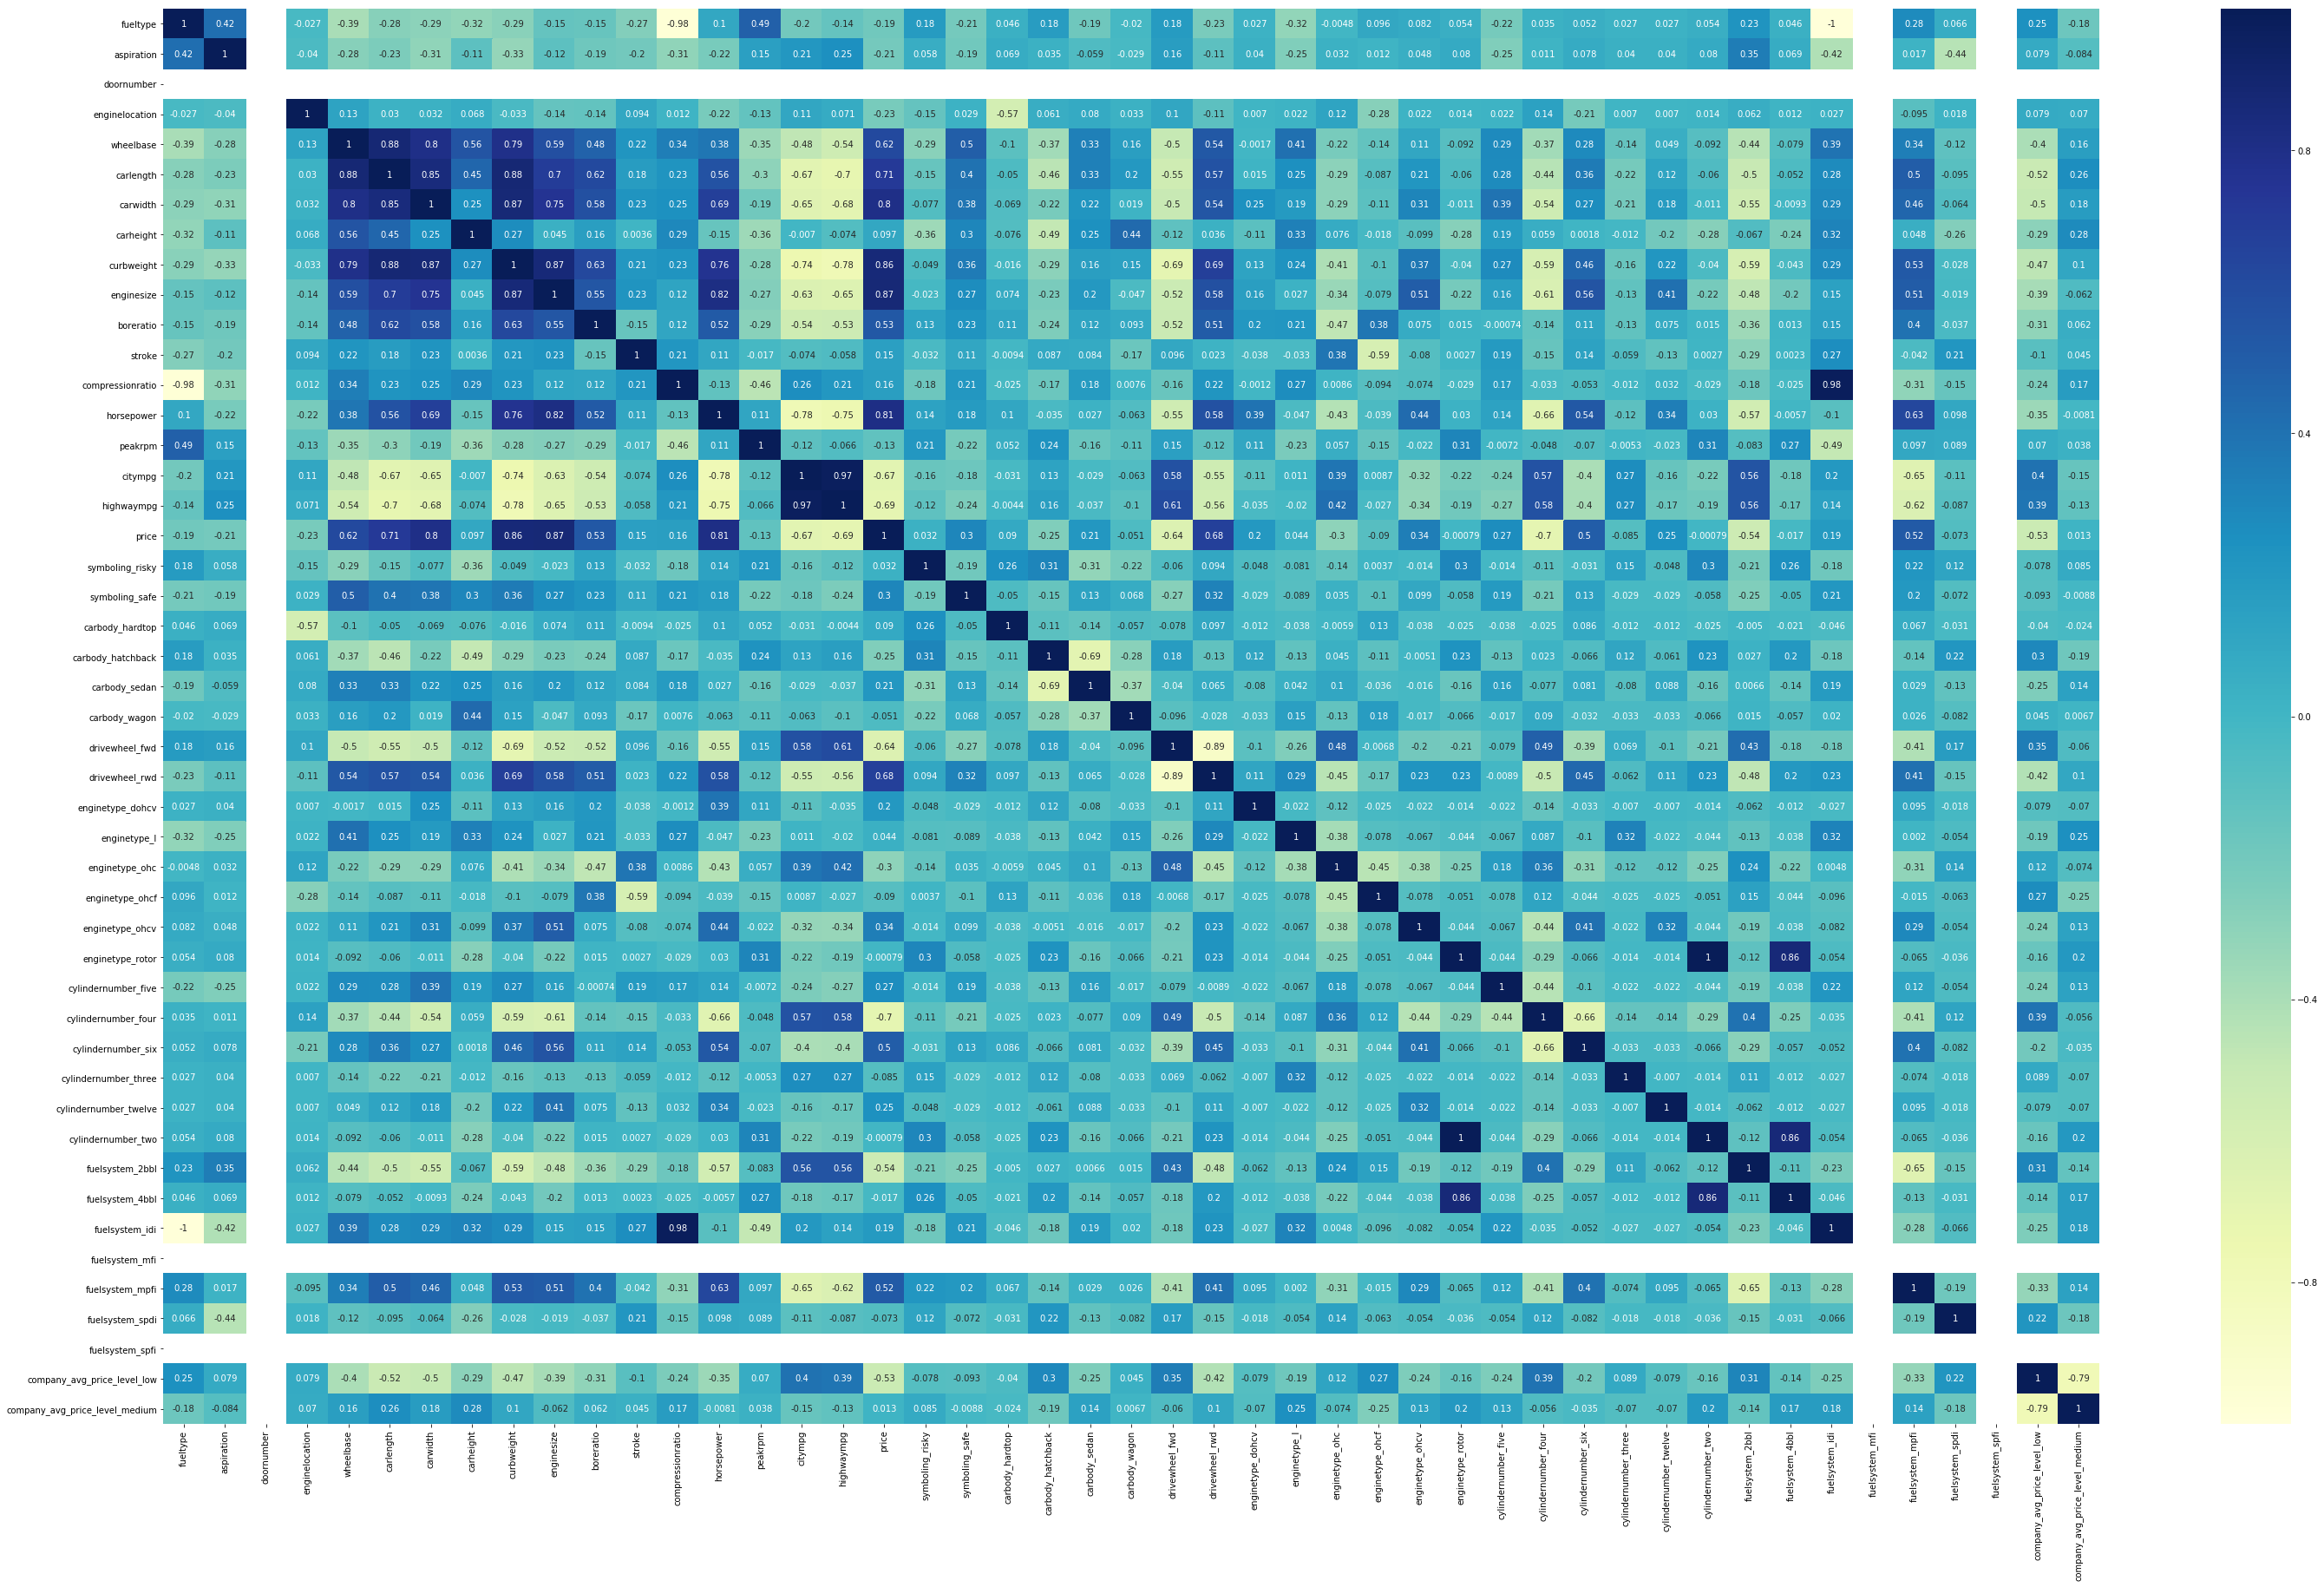

In [783]:
### Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (50, 30))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above heatmap it is very clear that `price` is highly correlated with `enginesize`

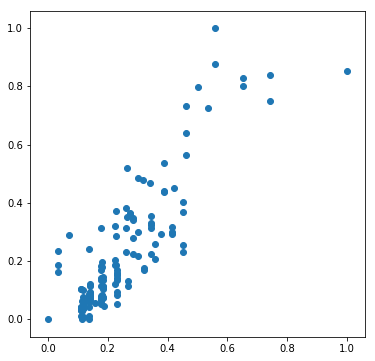

In [784]:
#Let's draw scatter plot between price and enginesize

plt.figure(figsize=(6,6))
plt.scatter(df_train.enginesize,df_train.price)
plt.show()

### Dividing into X and Y sets for the model building

In [785]:
y_train = df_train.pop('price')
X_train = df_train

## Step 5: Building a linear model

Fit a regression line through the training data using `statsmodels`

In [786]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['enginesize']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [787]:
# Check the parameters obtained

lr.params

const        -0.072888
enginesize    1.210676
dtype: float64

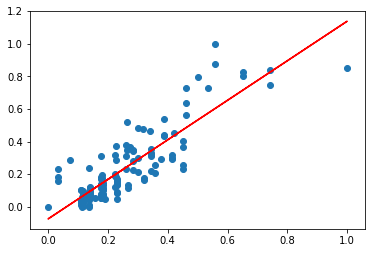

In [788]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], -0.072888 + 1.210676*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [789]:
# Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.753
Model:                            OLS   Adj. R-squared:                  0.752
Method:                 Least Squares   F-statistic:                     430.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.09e-44
Time:                        23:53:21   Log-Likelihood:                 117.01
No. Observations:                 143   AIC:                            -230.0
Df Residuals:                     141   BIC:                            -224.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0729      0.017     -4.362      0.0

### Adding another variable

The R-squared value obtained is `0.753` which is pretty good score. Let's go ahead and add the second most highly correlated variable, i.e. `curbweight` and see if we can improve the score more.

In [790]:
# Assign all the feature variables to X
X_train_lm = X_train[['enginesize', 'curbweight']]

In [791]:
# Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train_lm)

lr = sm.OLS(y_train, X_train_lm).fit()

lr.params

const        -0.128113
enginesize    0.678162
curbweight    0.450496
dtype: float64

In [792]:
# Check the summary
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     284.0
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.31e-50
Time:                        23:53:21   Log-Likelihood:                 132.84
No. Observations:                 143   AIC:                            -259.7
Df Residuals:                     140   BIC:                            -250.8
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1281      0.018     -7.239      0.0

 Adding a variable `curbbweight` increased our Adjusted R-squared value to `0.799` which means that both `enginesize` and `curbweight` should be sriving variables for predicting `price` of a car

### RFE (Recursive Feature Elimination)

Now Let's use Recursive Feature Elimination to determine which features doesn't influence predicting price of a car

In [793]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [794]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE on 15 features
rfe = rfe.fit(X_train, y_train)

In [795]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('fueltype', False, 12),
 ('aspiration', False, 15),
 ('doornumber', False, 30),
 ('enginelocation', True, 1),
 ('wheelbase', True, 1),
 ('carlength', False, 17),
 ('carwidth', True, 1),
 ('carheight', False, 20),
 ('curbweight', True, 1),
 ('enginesize', False, 4),
 ('boreratio', False, 3),
 ('stroke', False, 5),
 ('compressionratio', False, 22),
 ('horsepower', True, 1),
 ('peakrpm', False, 9),
 ('citympg', False, 14),
 ('highwaympg', True, 1),
 ('symboling_risky', False, 29),
 ('symboling_safe', False, 19),
 ('carbody_hardtop', True, 1),
 ('carbody_hatchback', True, 1),
 ('carbody_sedan', True, 1),
 ('carbody_wagon', True, 1),
 ('drivewheel_fwd', False, 16),
 ('drivewheel_rwd', False, 28),
 ('enginetype_dohcv', True, 1),
 ('enginetype_l', False, 18),
 ('enginetype_ohc', False, 7),
 ('enginetype_ohcf', False, 8),
 ('enginetype_ohcv', False, 10),
 ('enginetype_rotor', False, 2),
 ('cylindernumber_five', False, 23),
 ('cylindernumber_four', False, 11),
 ('cylindernumber_six', False, 2

In [796]:
col = X_train.columns[rfe.support_]
col

Index(['enginelocation', 'wheelbase', 'carwidth', 'curbweight', 'horsepower',
       'highwaympg', 'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'enginetype_dohcv', 'cylindernumber_three',
       'cylindernumber_twelve', 'company_avg_price_level_low',
       'company_avg_price_level_medium'],
      dtype='object')

In [797]:
X_train.columns[~rfe.support_]

Index(['fueltype', 'aspiration', 'doornumber', 'carlength', 'carheight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'peakrpm',
       'citympg', 'symboling_risky', 'symboling_safe', 'drivewheel_fwd',
       'drivewheel_rwd', 'enginetype_l', 'enginetype_ohc', 'enginetype_ohcf',
       'enginetype_ohcv', 'enginetype_rotor', 'cylindernumber_five',
       'cylindernumber_four', 'cylindernumber_six', 'cylindernumber_two',
       'fuelsystem_2bbl', 'fuelsystem_4bbl', 'fuelsystem_idi',
       'fuelsystem_mfi', 'fuelsystem_mpfi', 'fuelsystem_spdi',
       'fuelsystem_spfi'],
      dtype='object')

### Building model using statsmodel, for the detailed statistics

In [798]:
import statsmodels.api as sm 
#Let's define a function to build a model as it is a continuous step
def build_statsmodel(X_train):
    # Adding a constant variable  
    X_train = sm.add_constant(X_train)
    lm = sm.OLS(y_train,X_train).fit() 
    print(lm.summary())
    return lm

In [799]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [800]:
lm_new = build_statsmodel(X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.939
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     129.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.15e-69
Time:                        23:53:22   Log-Likelihood:                 216.41
No. Observations:                 143   AIC:                            -400.8
Df Residuals:                     127   BIC:                            -353.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

p-value for `wheelbase` is greater than 0.05. Hence it is isignificant and let's remove it

In [801]:
X_train_1 = X_train_rfe.drop(["wheelbase"], axis = 1)

**Rebuild the Model**

In [802]:
X_train_lm = build_statsmodel(X_train_1)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.931
Method:                 Least Squares   F-statistic:                     138.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           5.22e-70
Time:                        23:53:22   Log-Likelihood:                 215.63
No. Observations:                 143   AIC:                            -401.3
Df Residuals:                     128   BIC:                            -356.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

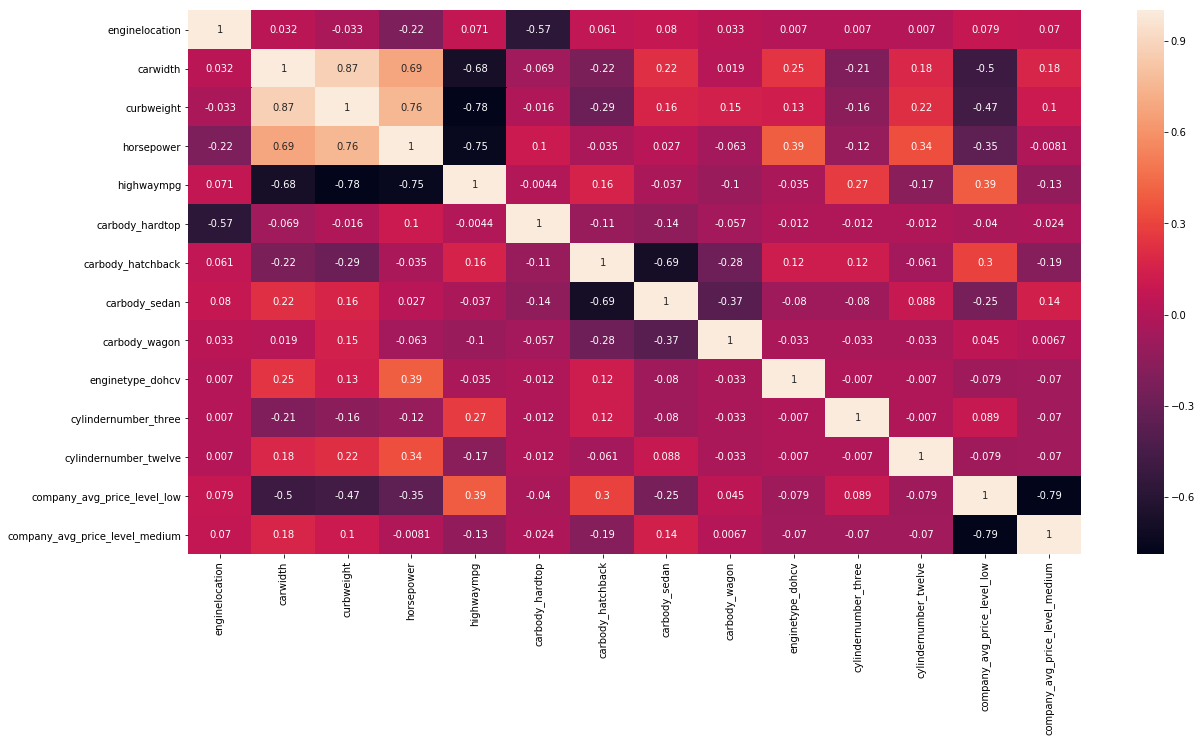

In [803]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_1.corr(),annot = True)

### VIF (Variance Inflation Factor)

Let's calculate VIF for the new model obtained

In [804]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_VIF(X_train):
    vif = pd.DataFrame()
    X = X_train
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [805]:
calculate_VIF(X_train_1)

,Features,VIF
0,enginelocation,78.50
2,curbweight,42.04
1,carwidth,40.66
7,carbody_sedan,18.39
4,highwaympg,16.93
3,horsepower,15.03
6,carbody_hatchback,14.14
12,company_avg_price_level_low,9.92
13,company_avg_price_level_medium,6.90
8,carbody_wagon,5.71


Let's drop `enginelocation` as it is having very high VIF value `78.50`

In [806]:
X_train_2 = X_train_1.drop(["enginelocation"], axis = 1)

**Rebuild the Model**

In [807]:
X_train_lm = build_statsmodel(X_train_2)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.935
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     142.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           9.47e-70
Time:                        23:53:25   Log-Likelihood:                 212.15
No. Observations:                 143   AIC:                            -396.3
Df Residuals:                     129   BIC:                            -354.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

P-value for `carbody_hardtop` is 0.390 which is greater than `0.05`. Hence let's remove it

In [808]:
X_train_3 = X_train_2.drop(["carbody_hardtop"], axis = 1)

**Rebuild the Model**

In [809]:
X_train_lm = build_statsmodel(X_train_3)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.934
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     154.3
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.08e-70
Time:                        23:53:25   Log-Likelihood:                 211.74
No. Observations:                 143   AIC:                            -397.5
Df Residuals:                     130   BIC:                            -359.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [810]:
calculate_VIF(X_train_3)

,Features,VIF
0,carwidth,39.46
1,curbweight,38.98
2,horsepower,12.54
5,carbody_sedan,10.84
3,highwaympg,9.41
4,carbody_hatchback,8.26
10,company_avg_price_level_low,7.26
11,company_avg_price_level_medium,4.98
6,carbody_wagon,3.91
7,enginetype_dohcv,1.62


P-value for `highwaympg` is `0.157` which is greater than `0.05`. Hence let's remove it

In [811]:
X_train_4 = X_train_3.drop(["highwaympg"], axis = 1)

**Rebuild the Model**

In [812]:
X_train_lm = build_statsmodel(X_train_4)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.933
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     166.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.21e-71
Time:                        23:53:25   Log-Likelihood:                 210.63
No. Observations:                 143   AIC:                            -397.3
Df Residuals:                     131   BIC:                            -361.7
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

P-value for `cylindernumber_twelve` is `0.156` which is greater than `0.05`. Hence let's remove it

In [813]:
X_train_5 = X_train_4.drop(["cylindernumber_twelve"], axis = 1)

**Rebuild the Model**

In [814]:
X_train_lm = build_statsmodel(X_train_5)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     181.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           4.35e-72
Time:                        23:53:25   Log-Likelihood:                 209.53
No. Observations:                 143   AIC:                            -397.1
Df Residuals:                     132   BIC:                            -364.5
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [815]:
calculate_VIF(X_train_5)

,Features,VIF
0,carwidth,39.20
1,curbweight,38.24
2,horsepower,10.20
4,carbody_sedan,8.67
3,carbody_hatchback,6.95
8,company_avg_price_level_low,5.53
9,company_avg_price_level_medium,4.07
5,carbody_wagon,3.59
6,enginetype_dohcv,1.47
7,cylindernumber_three,1.06


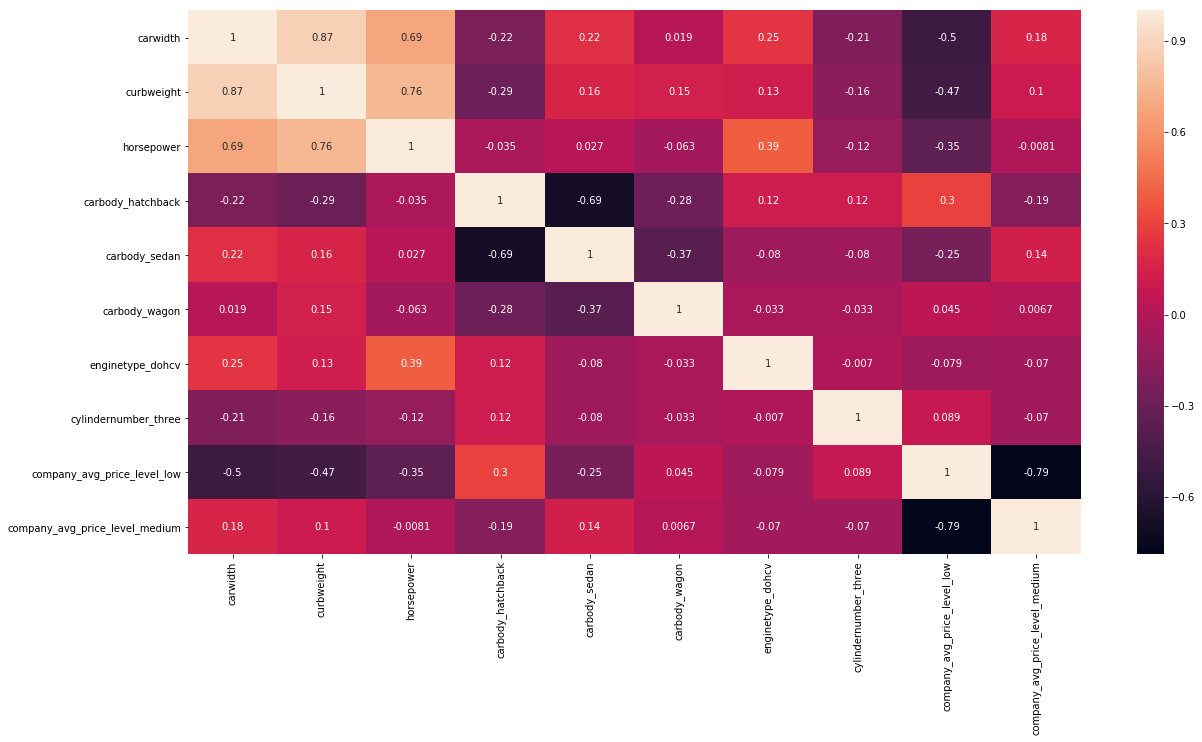

In [816]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_5.corr(),annot = True)

`curbweight`,`carwidth` and `horsepower` are mostly correlated with each other. After experimenting, it is observed that if we remove `horsepower` then p-values aren't being effected.Hence, Let's remove `horsepower` as it's VIF value is `10.20`

In [817]:
X_train_6 = X_train_5.drop(["horsepower"], axis = 1)

**Rebuild the Model**

In [818]:
X_train_lm = build_statsmodel(X_train_6)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     153.1
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           1.09e-65
Time:                        23:53:28   Log-Likelihood:                 190.71
No. Observations:                 143   AIC:                            -361.4
Df Residuals:                     133   BIC:                            -331.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [819]:
calculate_VIF(X_train_6)

,Features,VIF
0,carwidth,39.02
1,curbweight,25.30
3,carbody_sedan,8.62
2,carbody_hatchback,6.93
7,company_avg_price_level_low,5.53
8,company_avg_price_level_medium,4.06
4,carbody_wagon,3.44
5,enginetype_dohcv,1.20
6,cylindernumber_three,1.06


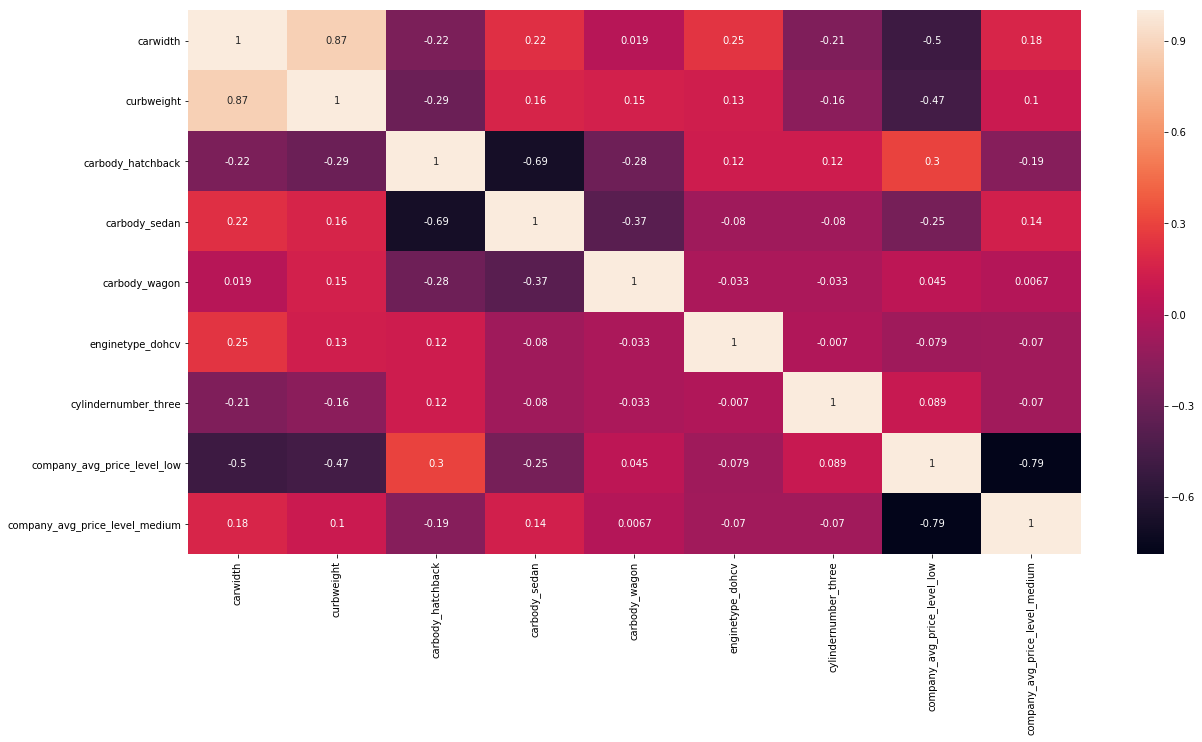

In [820]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_6.corr(),annot = True)

P-value for `enginetype_dohcv` is `0.913` which is greater than `0.05`. Hence let's remove it

In [821]:
X_train_7 = X_train_6.drop(["enginetype_dohcv"], axis = 1)

**Rebuild the Model**

In [822]:
X_train_lm = build_statsmodel(X_train_7)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.912
Model:                            OLS   Adj. R-squared:                  0.907
Method:                 Least Squares   F-statistic:                     173.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           8.08e-67
Time:                        23:53:30   Log-Likelihood:                 190.71
No. Observations:                 143   AIC:                            -363.4
Df Residuals:                     134   BIC:                            -336.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [823]:
calculate_VIF(X_train_7)

,Features,VIF
0,carwidth,35.59
1,curbweight,23.99
3,carbody_sedan,8.60
2,carbody_hatchback,6.91
6,company_avg_price_level_low,5.31
7,company_avg_price_level_medium,3.82
4,carbody_wagon,3.44
5,cylindernumber_three,1.06


`carwidth` is having high VIF value i.e. `35.59` and is strongly correlated with `curbweight`. Hence let's go ahead and remove this

In [824]:
X_train_8 = X_train_7.drop(["carwidth"], axis = 1)

**Rebuild the Model**

In [825]:
X_train_lm = build_statsmodel(X_train_8)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.902
Method:                 Least Squares   F-statistic:                     186.9
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           3.27e-66
Time:                        23:53:30   Log-Likelihood:                 186.36
No. Observations:                 143   AIC:                            -356.7
Df Residuals:                     135   BIC:                            -333.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [826]:
calculate_VIF(X_train_8)

,Features,VIF
2,carbody_sedan,7.36
1,carbody_hatchback,5.93
5,company_avg_price_level_low,5.31
0,curbweight,5.01
6,company_avg_price_level_medium,3.74
3,carbody_wagon,3.35
4,cylindernumber_three,1.04


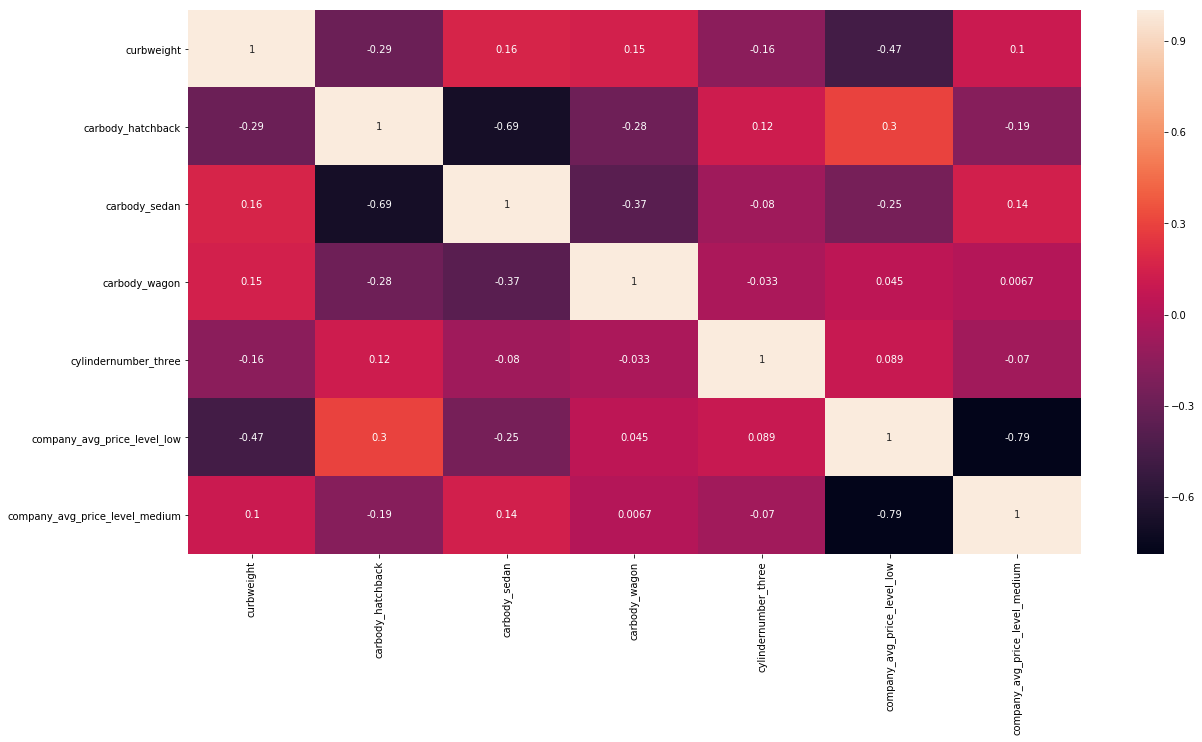

In [827]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_8.corr(),annot = True)

In [828]:
X_train_9 = X_train_8.drop(["carbody_hatchback"], axis = 1)

**Rebuild the Model**

In [829]:
X_train_lm = build_statsmodel(X_train_9)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     210.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.88e-66
Time:                        23:53:31   Log-Likelihood:                 183.61
No. Observations:                 143   AIC:                            -353.2
Df Residuals:                     136   BIC:                            -332.5
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [830]:
calculate_VIF(X_train_9)

,Features,VIF
0,curbweight,3.13
1,carbody_sedan,2.31
5,company_avg_price_level_medium,2.04
4,company_avg_price_level_low,1.63
2,carbody_wagon,1.45
3,cylindernumber_three,1.02


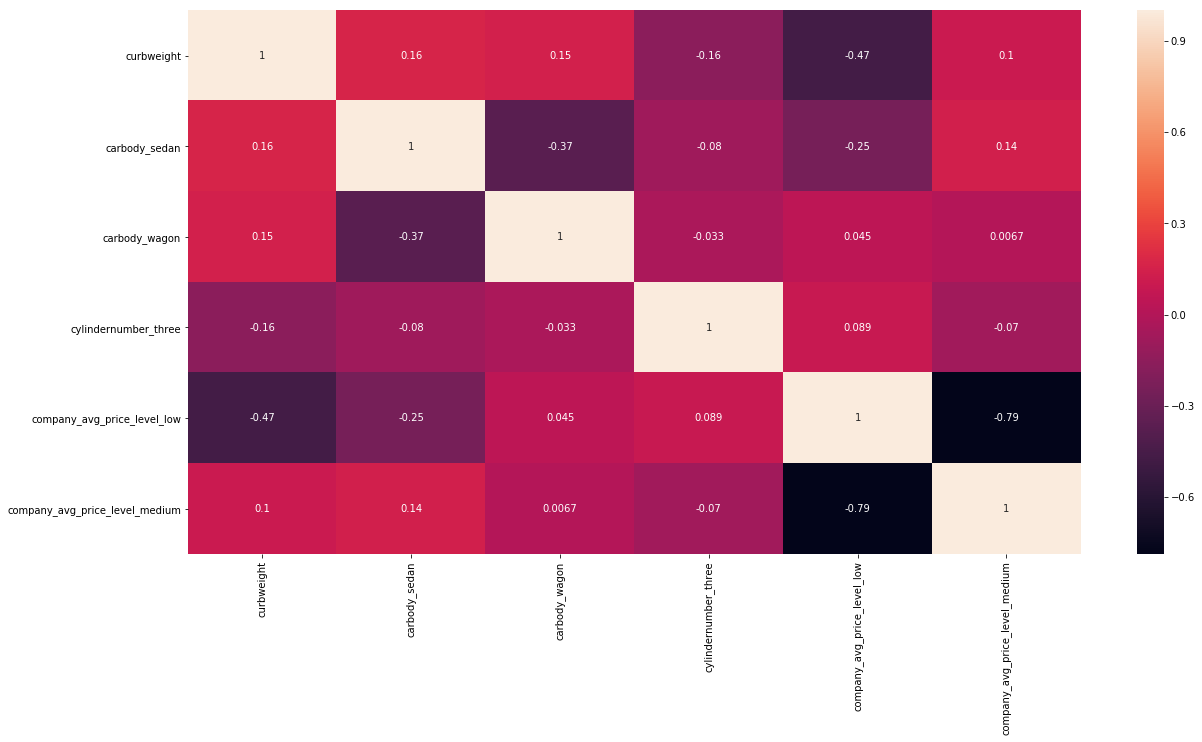

In [831]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_9.corr(),annot = True)

In [832]:
X_train_10 = X_train_9.drop(["carbody_sedan"], axis = 1)

**Rebuild the Model**

In [833]:
X_train_lm = build_statsmodel(X_train_10)

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.902
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     252.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.74e-67
Time:                        23:53:32   Log-Likelihood:                 183.12
No. Observations:                 143   AIC:                            -354.2
Df Residuals:                     137   BIC:                            -336.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [834]:
calculate_VIF(X_train_10)

,Features,VIF
0,curbweight,2.45
4,company_avg_price_level_medium,1.88
3,company_avg_price_level_low,1.55
1,carbody_wagon,1.20
2,cylindernumber_three,1.02


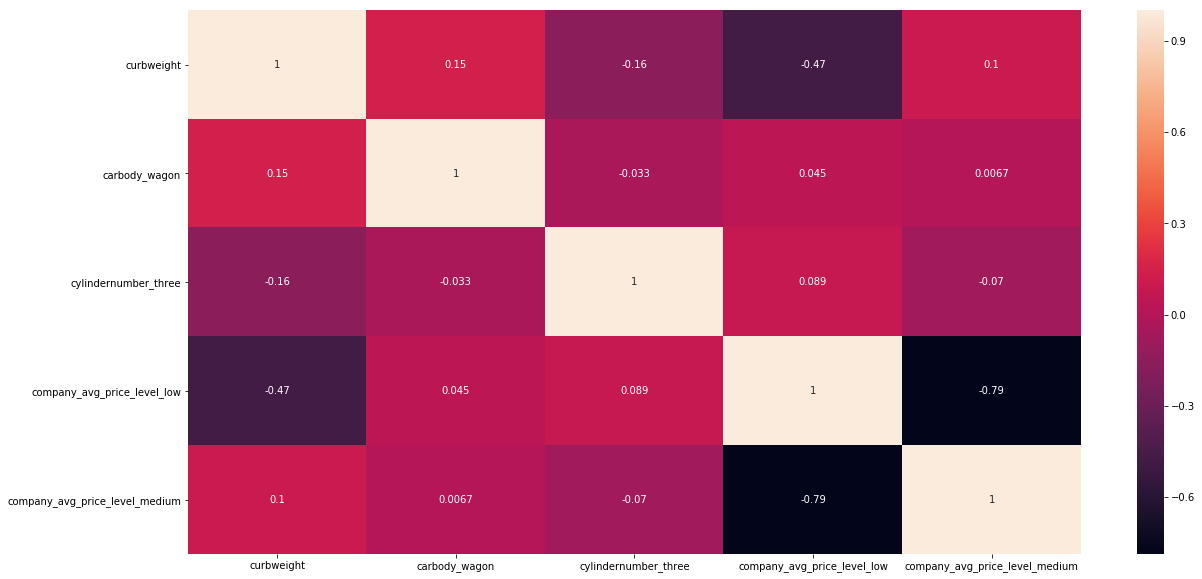

In [835]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_10.corr(),annot = True)

In [836]:
X_train_11 = X_train_10.drop(["cylindernumber_three"], axis = 1)

**Rebuild the Model**

In [837]:
#X_train_lm = build_statsmodel(X_train_11)
X_train_11 = sm.add_constant(X_train_11)
lm11 = sm.OLS(y_train,X_train_11).fit() 
lm11.params

const                             0.242152
curbweight                        0.609404
carbody_wagon                    -0.063353
company_avg_price_level_low      -0.318822
company_avg_price_level_medium   -0.275358
dtype: float64

In [838]:
print(lm11.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.898
Method:                 Least Squares   F-statistic:                     314.6
Date:                Mon, 29 Apr 2019   Prob (F-statistic):           2.80e-68
Time:                        23:53:33   Log-Likelihood:                 182.43
No. Observations:                 143   AIC:                            -354.9
Df Residuals:                     138   BIC:                            -340.0
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const       

In [839]:
calculate_VIF(X_train_11)

,Features,VIF
0,const,29.33
3,company_avg_price_level_low,4.55
4,company_avg_price_level_medium,3.54
1,curbweight,1.78
2,carbody_wagon,1.08


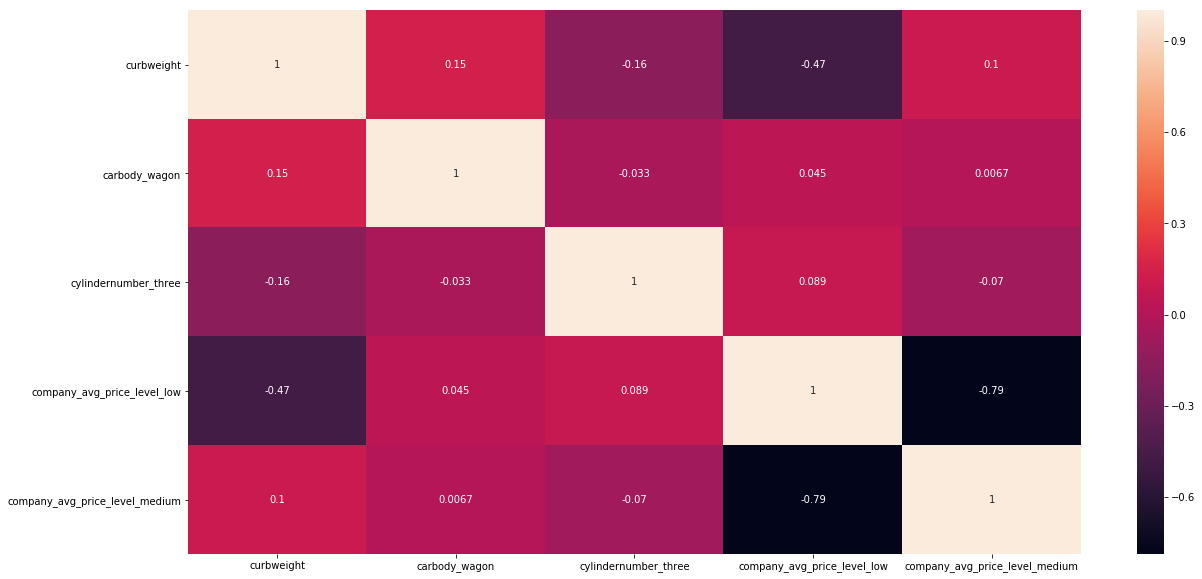

In [840]:
plt.figure(figsize = (20,10))  
sns.heatmap(X_train_10.corr(),annot = True)

## Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [841]:
y_train_price = lm11.predict(X_train_11)

In [842]:
# Importing the required libraries for plots.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Text(0.5, 0, 'Errors')

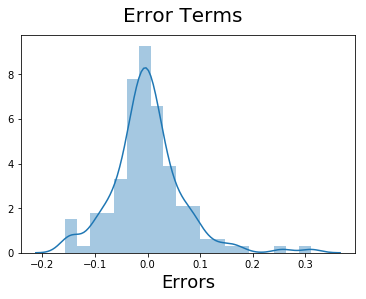

In [843]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Making Predictions

#### Applying the scaling on the test sets

In [844]:
#Apply scaler to all Numeric variables (Except Dummy & Mapped categorical variables)

numerical_variables = ['wheelbase','carlength','carwidth','carheight', 'curbweight','enginesize', 'boreratio', 'stroke','compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price']
df_test[numerical_variables] = scaler.transform(df_test[numerical_variables])

In [845]:
df_test.head()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_avg_price_level_low,company_avg_price_level_medium
160,1,1,1,1,0.313793,0.409756,0.341667,0.460177,0.235066,0.139623,...,0,1,0,0,0,0,0,0,1,0
186,1,1,1,1,0.368966,0.497561,0.433333,0.699115,0.305275,0.181132,...,0,0,0,0,0,1,0,0,0,1
59,1,1,1,1,0.420690,0.596748,0.516667,0.522124,0.347944,0.230189,...,0,1,0,0,0,0,0,0,0,1
165,1,1,1,1,0.272414,0.448780,0.308333,0.424779,0.301396,0.139623,...,0,0,0,0,0,1,0,0,1,0
140,1,1,1,1,0.231034,0.263415,0.291667,0.699115,0.291699,0.177358,...,0,1,0,0,0,0,0,0,1,0


In [846]:
df_test.describe()

,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,...,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,company_avg_price_level_low,company_avg_price_level_medium
count,62.000000,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,...,62.0,62.000000,62.0,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000,62.000000
mean,0.887097,0.822581,1.0,0.967742,0.437764,0.559481,0.480376,0.559663,0.428470,0.265673,...,0.0,0.258065,0.0,0.112903,0.016129,0.500000,0.048387,0.016129,0.451613,0.435484
std,0.319058,0.385142,0.0,0.178127,0.212861,0.189947,0.165440,0.215811,0.179488,0.162820,...,0.0,0.441142,0.0,0.319058,0.127000,0.504082,0.216335,0.127000,0.501716,0.499868
min,0.000000,0.000000,1.0,0.000000,0.000000,0.056911,0.183333,0.141593,0.128394,0.067925,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,1.0,1.000000,0.313793,0.459350,0.358333,0.384956,0.305275,0.177358,...,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.0,1.000000,0.387931,0.547967,0.441667,0.588496,0.406129,0.226415,...,0.0,0.000000,0.0,0.000000,0.000000,0.500000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.0,1.000000,0.570690,0.719919,0.516667,0.699115,0.564876,0.316038,...,0.0,0.750000,0.0,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.0,1.000000,1.182759,1.089431,0.975000,1.061947,0.935609,0.932075,...,0.0,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [847]:
y_test = df_test.pop('price')
X_test = df_test

In [848]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_train_11.drop('const', axis=1, inplace=True)
X_test_new = X_test[X_train_11.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [849]:
# Making predictions
y_pred = lm11.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'y_pred')

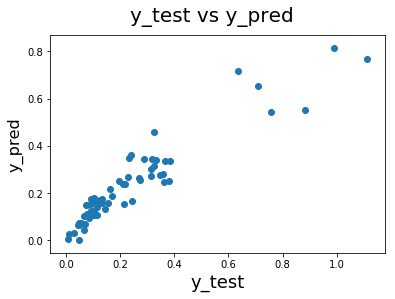

In [850]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-Label

In [851]:
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(y_test, y_pred))
print('Model RMSE:',rmse)

from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
print('Model r2_score:',r2)

Model RMSE: 0.08751363156329285
Model r2_score: 0.8567092865555568


## Inferences

1. Following are the values obtained after building a final model


|Predictor Variable                     | Co-efficient value| p-value | VIF |
|---------------------------------------|-------------------|---------|-----|
|curbweight                             |  0.609404         | 0.000   |1.78 |
|carbody_wagon                          | -0.063353         | 0.000   |1.08 |
|company_avg_price_level_low            | -0.318822         | 0.000   |4.55 |
|company_avg_price_level_medium         |  -0.275358        | 0.000   |3.54 |

2. Linear Equation of Best Fitted Line:

**price = 0.242152 + (0.609404 * curbweight) + (-0.063353 * carbody_wagon) + (-0.318822 * company_avg_price_level_low) +          (-0.275358 * company_avg_price_level_medium)**

3. From the above equation we can infer that 
    - There are 4 independent variables that can predict the price of a car. They are : `curbweight`, `carbody_wagon`, `company_avg_price_level_low`, `company_avg_price_level_medium`
    - If `curbweight` increases then `price` of the car also increases by 0.61 times
    - If rest three paramters increases then `price` of a car decreases as the co-efficient values are negative

4. `Adj. R-squared` value of trained model is 0.898 which is around 90% and `R-squared` value is **90.2%**

5. Predicted r2_score : `0.8567092865555568` which is almost equivalent to Adjusted R-Squared value : `0.898` of trained model which indicates that tested accuracy is good

Suggestions:
     - We can also build a model by including Derived metrics such as (carlength/carwidth ratio etc) which may improve the accuracy of the model
     - Experimenting by taking different set of features might change the values and helps in analyzing different perspectives
     